In [ ]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00


In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle # để ghi file nhị phân
import nltk
from keras.layers import Dense, Embedding, LSTM, Dropout,SimpleRNN,LSTM,Bidirectional
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.models import model_from_json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DeepLearning/Research/NLP')

In [ ]:
data = pd.read_excel('./Data4.xlsx')
X= data["question"].tolist()
Y= data["answer"]
print("thuộc tính điều kiện")
print(X)
print("thuộc tính cần dự đoán")
print(Y)

thuộc tính điều kiện
['Tạm biệt bot', 'Goodbye', 'Tạm biệt mày nhé bot', 'Chào tạm biệt', 'Ngày mai gặp lại nhé bot', 'Adios', 'tạm biệt, tạm biệt, tạm biệt', 'see you again', 'Tạm biệt mày nhé', 'Xin chào tạm biệt anh bạn của tôi', 'Tạm biệt', 'Tao đi đây', 'goodbye, see you again', 'Xin chào bot nhé?', 'Hi?', 'Hola?', 'How are you?', 'What about you?', 'ní hảo', 'ní hảo ma', 'ní hảo ní hảo ní hảo', 'xin chào xin chào xin chào', 'hello, good morning, good afternoon', 'good morning', 'good afternoon', 'mày có biết tư vấn tuyển sinh không?', 'tư vấn, tư vấn và tư vấn', 'mày hãy tư vấn cho tao', 'hello bot, tư vấn tuyển sinh cho tao', 'xin chào', 'tư vấn, tư vấn, tư vấn', 'xin chào bot, tao là Tùng', 'xin chào bot, tao là ', 'Tao giới thiệu, giới thiệu, giới thiệu giới thiệu', 'good morning, good morning, good morning, good afternoon', 'tôi tên là, tao là, xin chào', 'hello mày', 'hi mày', 'hello bot', 'bot rất thông minh', 'mình cảm ơn sự giúp đỡ nhiệt thành của bot', 'bot quả là thật n

In [ ]:
print(len(X),len(Y))

2060 2060


In [ ]:
le = preprocessing. LabelEncoder()
le.fit(Y)
list_label = list(le.classes_)
print(list_label)
print(len(list_label))
label = le.transform(Y)
print(len(label))

['1 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '10 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '2 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '3 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '4 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '5 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '6 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '7 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '8 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', '9 tín chỉ giá 630k đối với chuyên ngành, 590k đối với môn không thuộc chuyên ngành', 'Chỉ tiêu xét tuyển ngành công nghệ thông tin: 390', 'Chỉ tiêu xét tuyển ngành khoa học máy tính: 120', 'Chỉ tiêu xét tuyển ngành kĩ thuật

In [ ]:
onehot_encoder = OneHotEncoder (sparse=False)
# sparse=False trả về kết quả ở dạng ma trận
label = label.reshape(len(label), 1)
onehot_encoded = onehot_encoder.fit_transform(label)
print (onehot_encoded[0])
#onehot_encoded.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
def tienxuly(document):
  document = ViTokenizer.tokenize (document)
  # đưa về lower
  document = document.lower()
  # xóa các ký tự không cần thiết
  document = re.sub (r'[^\s\wáàảãạắằẳẵặấầẩẫậéèẻẽẹếềểễệóòỏõọốồổỗộớờởỡợíìỉĩịúùủũụứừửữựýỳỷỹỵđ_]',' ',document)
  # xóa khoảng trắng thừa
  document = re.sub (r'\s+', ' ', document).strip()
  return document

In [ ]:
for i in range(0, len(X)):
  X[i]= tienxuly(X[i])
X[0:10]

['tạm_biệt bot',
 'goodbye',
 'tạm_biệt mày nhé bot',
 'chào tạm_biệt',
 'ngày_mai gặp lại nhé bot',
 'adios',
 'tạm_biệt tạm_biệt tạm_biệt',
 'see you again',
 'tạm_biệt mày nhé',
 'xin chào tạm_biệt anh bạn của tôi']

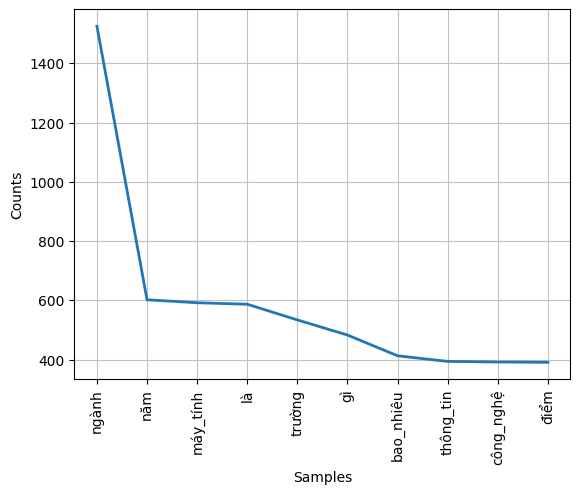

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
tokens = []
for i in range(0, len(X)):
  for j in X[i].split():
    tokens.append(j)
freq = nltk. FreqDist(tokens)
freq.plot(10, cumulative=False)

In [ ]:
# https://viblo.asia/p/xu-ly-ngon-ngu-tu-nhien-voi-python-p7-awj53XA8K6m
# Stopwords hiểu đơn giản là các từ có tần số xuất hiện nhiều như the, to
stopwords_file = open("./stop_words_Vietnamese.txt", "r")
content = stopwords_file.read()
stopwords_VN = content.splitlines()
stopwords_file.close()
#print(stopwords_VN)
#stopword trong documents
stopword = ['nghành', 'ngành', 'trường']
stopwords = stopwords_VN + stopword
def remove_stopwords (line):
  words = []
  for word in line.strip().split():
    if word not in stopwords:
      words.append(word)
  return ' ' . join(words)

for i in range(0,len (X)):
  X[i]= remove_stopwords (X[i])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts (X)
text_to_sequence = tokenizer.texts_to_sequences (X)
text_to_sequence

[[145, 87, 66],
 [225],
 [145, 87, 103, 151, 66],
 [138, 145, 87],
 [256, 257, 258, 151, 66],
 [259],
 [145, 87, 145, 87, 145, 87],
 [226, 159, 227],
 [145, 87, 103, 151],
 [146, 138, 145, 87, 260, 197, 40],
 [145, 87],
 [152, 73],
 [225, 226, 159, 227],
 [146, 138, 66, 151],
 [228],
 [261],
 [262, 263, 159],
 [264, 265, 159],
 [173, 174],
 [173, 174, 266],
 [173, 174, 173, 174, 173, 174],
 [146, 138, 146, 138, 146, 138],
 [198, 153, 175, 153, 212],
 [153, 175],
 [153, 212],
 [103, 85, 125, 126, 21, 30],
 [125, 126, 125, 126, 125, 126],
 [103, 229, 125, 126, 152],
 [198, 66, 125, 126, 21, 30, 152],
 [146, 138],
 [125, 126, 125, 126, 125, 126],
 [146, 138, 66, 152, 267],
 [146, 138, 66, 152],
 [152, 94, 104, 94, 104, 94, 104, 94, 104],
 [153, 175, 153, 175, 153, 175, 153, 212],
 [40, 268, 152, 146, 138],
 [198, 103],
 [228, 103],
 [198, 66],
 [66, 9, 113],
 [163, 119, 139, 131, 230, 127, 176, 66],
 [66, 164, 120, 127, 165],
 [163, 119, 139, 269, 176, 125, 126, 66],
 [120, 270, 66, 9, 11

In [ ]:
# Ví dụ qua 5 từ đầu tiên
for i in range(5):
  print("\nMã hóa từ thứ: ",i)
  print("Từ gốc : ",X[i] )
  print("Mã hóa thành các chuỗi số : ", text_to_sequence[i])


Mã hóa từ thứ:  0
Từ gốc :  tạm_biệt bot
Mã hóa thành các chuỗi số :  [145, 87, 66]

Mã hóa từ thứ:  1
Từ gốc :  goodbye
Mã hóa thành các chuỗi số :  [225]

Mã hóa từ thứ:  2
Từ gốc :  tạm_biệt mày nhé bot
Mã hóa thành các chuỗi số :  [145, 87, 103, 151, 66]

Mã hóa từ thứ:  3
Từ gốc :  chào tạm_biệt
Mã hóa thành các chuỗi số :  [138, 145, 87]

Mã hóa từ thứ:  4
Từ gốc :  ngày_mai gặp nhé bot
Mã hóa thành các chuỗi số :  [256, 257, 258, 151, 66]


In [ ]:
#tìm chiều dài của chuỗi dài nhất
max_length_sequence = max([len(i) for i in text_to_sequence])
padded_zeros_sequence = pad_sequences (text_to_sequence, maxlen = max_length_sequence, padding= "pre")
# padding "pre" thêm 8 vào phía trước, Post thêm 9 vào phía sau của text_to_sequence
padded_zeros_sequence

array([[  0,   0,   0, ..., 145,  87,  66],
       [  0,   0,   0, ...,   0,   0, 225],
       [  0,   0,   0, ..., 103, 151,  66],
       ...,
       [  0,   0,   0, ...,  87, 118,   1],
       [  0,   0,   0, ...,  12,   9,  11],
       [  0,   0,   0, ...,  12,   9,  11]], dtype=int32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_zeros_sequence, onehot_encoded, test_size=0.1, random_state=0)
#X_train. shape
X_test.shape
callback = tf.keras.callbacks. EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
TOT_SIZE = len(tokenizer.word_index)+1

In [ ]:
def RNN_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(SimpleRNN(300))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (99, activation='softmax'))
  return model

RNN_model = RNN_model()
RNN_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 16)            5008      
                                                                 
 simple_rnn (SimpleRNN)      (None, 300)               95100     
                                                                 
 dense (Dense)               (None, 200)               60200     
                                                                 
 dense_1 (Dense)             (None, 99)                19899     
                                                                 
Total params: 180207 (703.93 KB)
Trainable params: 180207 (703.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(X_train.shape, Y_train.shape)

(1854, 24) (1854, 99)


In [ ]:
history_RNN = RNN_model.fit(X_train, Y_train, epochs = 100, validation_split=0.2, batch_size=16, callbacks=callback)

Epoch 1/100
93/93 [==============================] - 6s 63ms/step - loss: 0.1142 - accuracy: 0.9703 - val_loss: 1.3407 - val_accuracy: 0.7871
Epoch 2/100
93/93 [==============================] - 6s 61ms/step - loss: 0.1390 - accuracy: 0.9582 - val_loss: 1.4951 - val_accuracy: 0.7736
Epoch 3/100
93/93 [==============================] - 2s 24ms/step - loss: 0.1834 - accuracy: 0.9386 - val_loss: 1.5450 - val_accuracy: 0.7817
Epoch 4/100
93/93 [==============================] - 2s 24ms/step - loss: 0.2910 - accuracy: 0.9056 - val_loss: 1.6189 - val_accuracy: 0.7574
Epoch 5/100
93/93 [==============================] - 2s 23ms/step - loss: 0.3085 - accuracy: 0.9056 - val_loss: 1.4714 - val_accuracy: 0.7655
Epoch 6/100
93/93 [==============================] - 3s 33ms/step - loss: 0.2528 - accuracy: 0.9137 - val_loss: 1.9537 - val_accuracy: 0.7385
Epoch 7/100
93/93 [==============================] - 4s 39ms/step - loss: 0.1683 - accuracy: 0.9427 - val_loss: 1.4612 - val_accuracy: 0.7978
Epoch 

In [ ]:
RNN_model.save('./RNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NameError: name 'history_RNN' is not defined

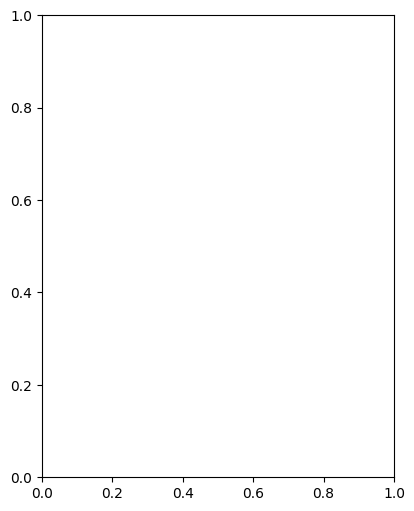

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def Bidirectional_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(Bidirectional (LSTM(500)))
  model.add(Dense (400, activation='relu'))
  model.add(Dense (300, activation='relu'))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (99, activation='softmax'))
  return model

Bidirectional_model = Bidirectional_model()
Bidirectional_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
Bidirectional_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 24, 16)            5168      
                                                                 
 bidirectional_1 (Bidirecti  (None, 1000)              2068000   
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 400)               400400    
                                                                 
 dense_11 (Dense)            (None, 300)               120300    
                                                                 
 dense_12 (Dense)            (None, 200)               60200     
                                                                 
 dense_13 (Dense)            (None, 99)                19899     
                                                      

In [ ]:
history_Bidirectional = Bidirectional_model.fit(X_train, Y_train, epochs = 100, validation_split=0.2, batch_size=16, callbacks=callback)

Epoch 1/100
93/93 [==============================] - 9s 48ms/step - loss: 4.4322 - accuracy: 0.0526 - val_loss: 4.3265 - val_accuracy: 0.0404
Epoch 2/100
93/93 [==============================] - 1s 12ms/step - loss: 3.9657 - accuracy: 0.0688 - val_loss: 3.7748 - val_accuracy: 0.0593
Epoch 3/100
93/93 [==============================] - 1s 16ms/step - loss: 3.4753 - accuracy: 0.0931 - val_loss: 3.4926 - val_accuracy: 0.0809
Epoch 4/100
93/93 [==============================] - 1s 15ms/step - loss: 3.2505 - accuracy: 0.1167 - val_loss: 3.2490 - val_accuracy: 0.1321
Epoch 5/100
93/93 [==============================] - 1s 12ms/step - loss: 3.0672 - accuracy: 0.1342 - val_loss: 3.1873 - val_accuracy: 0.1375
Epoch 6/100
93/93 [==============================] - 1s 14ms/step - loss: 2.8939 - accuracy: 0.1430 - val_loss: 2.8631 - val_accuracy: 0.1725
Epoch 7/100
93/93 [==============================] - 1s 13ms/step - loss: 2.7958 - accuracy: 0.1504 - val_loss: 2.8046 - val_accuracy: 0.1806
Epoch 

In [ ]:
Bidirectional_model.save('./Bidirectional_model.h5')

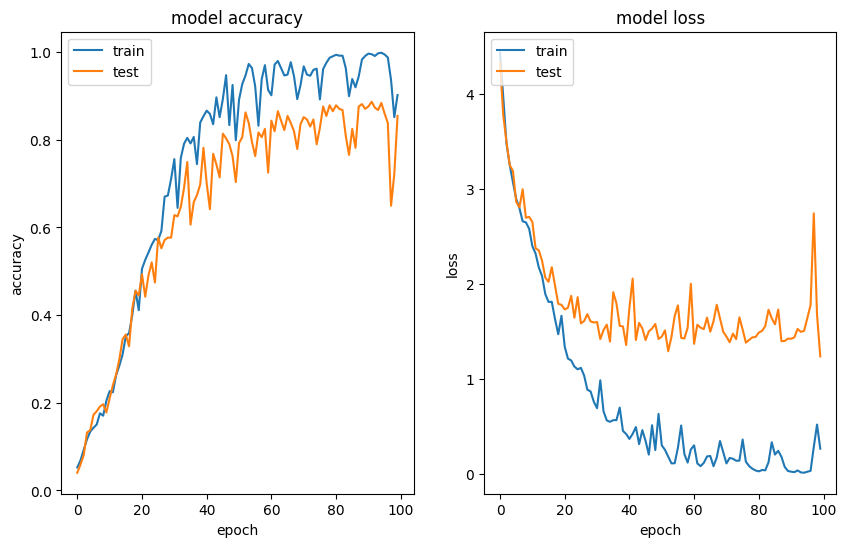

In [ ]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = history_Bidirectional.model.predict(X_test)
y_pred = np.argmax (y_hat, axis=1)
y_test_label = np.argmax (Y_test, axis=1)
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score (y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score (y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score (y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score (y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

7/7 [==============================] - 0s 9ms/step
Accuracy: 0.864078
Precision: 0.764377
Recall: 0.756502
F1 score: 0.741369


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
RNN_model = load_model('./RNN_model.h5')

In [ ]:
new_question = "tham gia câu lạc bộ các ngành khoa công nghệ thông tin"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
new_sequence = tokenizer.texts_to_sequences([new_question])
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

# Dự đoán câu trả lời
prediction = RNN_model.predict(new_padded)

# Giải mã nhãn
predicted_label = le.inverse_transform([np.argmax(prediction)])
print("Câu trả lời dự đoán:", predicted_label[0])

1/1 [==============================] - 0s 116ms/step
Câu trả lời dự đoán: thật
